# Time Series Forecasting Using ARIMA (Autoregressive Integrated Moving Average)

This analysis forecasts future values of mean temperature (in Celsius) and humidity in Delhi, India. The data set contains weather information from January 2017 to April 2017. The data set was downloaded from Kaggle.

In [85]:
import pandas as pd

# read in the data set
delhi_weather = pd.read_csv('..\Data\DailyDelhiClimateTest.csv')

# view the first few rows
delhi_weather.head()

,date,meantemp_celsius,humidity,wind_speed,meanpressure
0,1/1/2017,15.913043,85.869565,2.743478,59.000000
1,1/2/2017,18.500000,77.222222,2.894444,1018.277778
2,1/3/2017,17.111111,81.888889,4.016667,1018.333333
3,1/4/2017,18.700000,70.050000,4.545000,1015.700000
4,1/5/2017,18.388889,74.944444,3.300000,1014.333333


In [86]:
import matplotlib.pyplot as plt
from datetime import datetime

# to plot visualizations within Jupyter Notebook
%matplotlib inline

# convert date field to datetime data type
delhi_weather['date'] = pd.to_datetime(delhi_weather['date'])

# set the date to the dataframe index
indexed_weather = delhi_weather.set_index(['date'])

# verify the new indexes
indexed_weather.head()

,meantemp_celsius,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [87]:
# verify the last 5 records for time series order
indexed_weather.tail()

,meantemp_celsius,humidity,wind_speed,meanpressure
date,,,,
2017-04-20,34.500,27.500000,5.562500,998.625000
2017-04-21,34.250,39.375000,6.962500,999.875000
2017-04-22,32.900,40.900000,8.890000,1001.600000
2017-04-23,32.875,27.500000,9.962500,1002.125000
2017-04-24,32.000,27.142857,12.157143,1004.142857


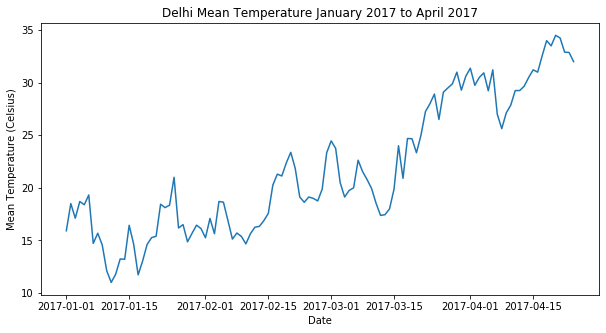

In [88]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# plot the mean temperature
plt.title('Delhi Mean Temperature January 2017 to April 2017')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (Celsius)')
plt.plot(indexed_weather['meantemp_celsius'])

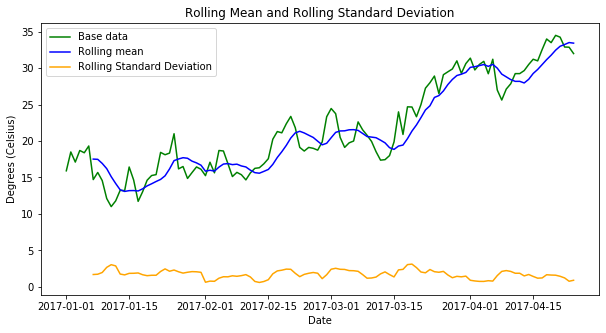

In [89]:
# calculate the rolling mean for each week
rolling_mean = indexed_weather['meantemp_celsius'].rolling(window=7).mean()

# calculate the standard deviation for each week
rolling_std_dev = indexed_weather['meantemp_celsius'].rolling(window=7).std()

# plot the rolling mean and rolling standard deviation
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Degrees (Celsius)')
plt.plot(indexed_weather['meantemp_celsius'], color='green', label='Base data')
plt.plot(rolling_mean, color='blue', label='Rolling mean')
plt.plot(rolling_std_dev, color='orange', label='Rolling Standard Deviation')
plt.legend(loc='best')

## Exploratory Analysis

As shown in the line charts above, there is a steady upward trend of mean temperature from January to April. This makes sense, since it gets warmer as the seasons change from winter to spring.

The time series is not stationary, since the rolling mean is not consistent across the entire time series. The variance does not have the same upward trend as the mean, but there are some sharp increases or decreases across the time series.

In [90]:
# Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

# determine number of lags using the Bayesian Information Criterion
df_test = adfuller(indexed_weather['meantemp_celsius'], autolag='BIC')

print('ADF Statistic: {}'.format(df_test[0]))
print('p-value: {}'.format(df_test[1]))
print('Critical Values:')
for key, value in df_test[4].items():
    print('{}: {}'.format(key, value))

ADF Statistic: -1.0964742756900836
p-value: 0.7164758732513667
Critical Values:
1%: -3.489589552580676
5%: -2.887477210140433
10%: -2.580604145195395


## Stationarity Analysis

As visually confirmed in the line charts, the Dickey-Fuller test also confirms that the time series is not stationary (since the p-value is greater than a normal significance level of 0.05).

In order to make the time series stationary, both log and differencing methods will be used to plot the difference between the previous point and the current point in the time series.

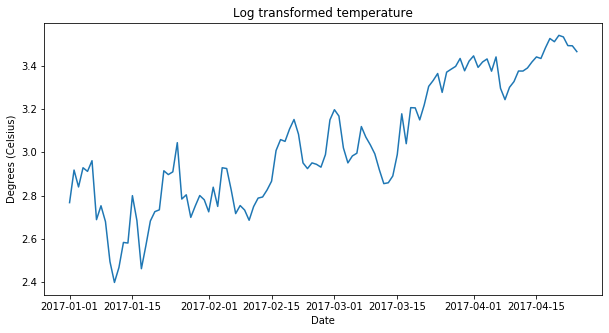

In [91]:
import numpy as np

# create a log transformed time series
log_weather = np.log(indexed_weather['meantemp_celsius'])
plt.title('Log transformed temperature')
plt.xlabel('Date')
plt.ylabel('Degrees (Celsius)')
plt.plot(log_weather)

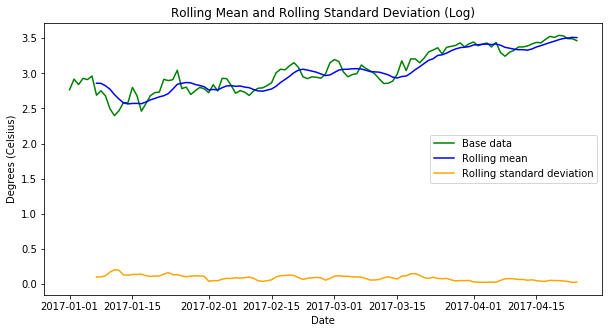

In [92]:
# calculate the rolling mean for each week
rolling_mean_log = log_weather.rolling(window=7).mean()

# calculate the rolling standard deviation for each week
rolling_std_dev_log = log_weather.rolling(window=7).std()

# plot the rolling mean and rolling variance
plt.title('Rolling Mean and Rolling Standard Deviation (Log)')
plt.xlabel('Date')
plt.ylabel('Degrees (Celsius)')
plt.plot(log_weather, color='green', label='Base data')
plt.plot(rolling_mean_log, color='blue', label='Rolling mean')
plt.plot(rolling_std_dev_log, color='orange', label='Rolling standard deviation')
plt.legend(loc='best')

In [93]:
# Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

# determine number of lags using the Bayesian Information Criterion
df_test = adfuller(log_weather, autolag='BIC')

print('ADF Statistic: {}'.format(df_test[0]))
print('p-value: {}'.format(df_test[1]))
print('Critical Values:')
for key, value in df_test[4].items():
    print('{}: {}'.format(key, value))

ADF Statistic: -1.4029343453293268
p-value: 0.5808685507889397
Critical Values:
1%: -3.489589552580676
5%: -2.887477210140433
10%: -2.580604145195395


## Log Transformation Analysis

The log transformation improved the stationarity of the time series. However, since the p-value is greater than a normal alpha of 0.05, the time series is still not stationary. The next step is taking the difference (by lag 1) values from the log data set.

In [94]:
# create a differenced time series
df_diff = log_weather - log_weather.shift()
df_diff.dropna(inplace=True)
    
# verify the differences
print(df_diff.head())

date
2017-01-02    0.150632
2017-01-03   -0.078043
2017-01-04    0.088795
2017-01-05   -0.016777
2017-01-06    0.049300
Name: meantemp_celsius, dtype: float64


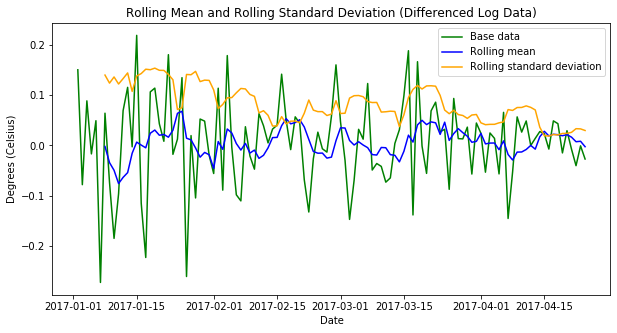

In [95]:
# calculate the rolling mean for each week
rolling_mean_diff = df_diff.rolling(window=7).mean()

# calculate the rolling standard deviation for each week
rolling_std_dev_diff = df_diff.rolling(window=7).std()

# plot the rolling mean and rolling variance
plt.title('Rolling Mean and Rolling Standard Deviation (Differenced Log Data)')
plt.xlabel('Date')
plt.ylabel('Degrees (Celsius)')
plt.plot(df_diff, color='green', label='Base data')
plt.plot(rolling_mean_diff, color='blue', label='Rolling mean')
plt.plot(rolling_std_dev_diff, color='orange', label='Rolling standard deviation')
plt.legend(loc='best')

In [96]:
# perform Dickey-Fuller test to confirm stationarity

# determine number of lags using the Bayesian Information Criterion
df_test_diff = adfuller(df_diff, autolag='BIC')

# print the results
print('ADF Statistic: {}'.format(df_test_diff[0]))
print('p-value: {}'.format(df_test_diff[1]))
print('Critical Values:')
for key, value in df_test_diff[4].items():
    print('{}: {}'.format(key, value))

ADF Statistic: -11.759732784983914
p-value: 1.155652943829479e-21
Critical Values:
1%: -3.4901313156261384
5%: -2.8877122815688776
10%: -2.5807296460459184


## Differenced Analysis

As shown from the Dickey-Fuller test above, the time series is now stationary (since the log data set has been differenced), since the p-value is much smaller than a normal significance level of 0.05.

The next step of the analysis is to plot the Autocorrelation Function (ACF) of the logged and differenced data to determine the number of lags to use in the Autoregressive part of the ARIMA model, and then plot the Partial Autocorrelation Function (PACF) to determine the number of lag errors to use in the Moving Average part of the ARIMA model.

<BarContainer object of 21 artists>

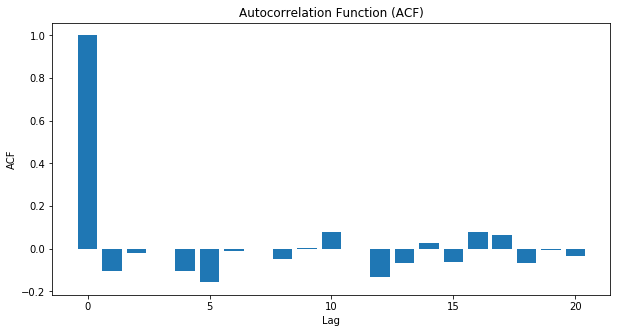

In [97]:
# hide Jupyter Notebook warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import acf, pacf

# instantiate ACF and PACF objects
weather_acf = acf(df_diff, nlags=20)
weather_pacf = pacf(df_diff, nlags=20, method='ols')

lags = [n for n in range(21)]

# plot the ACF
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.bar(x=lags, height=weather_acf)

<BarContainer object of 21 artists>

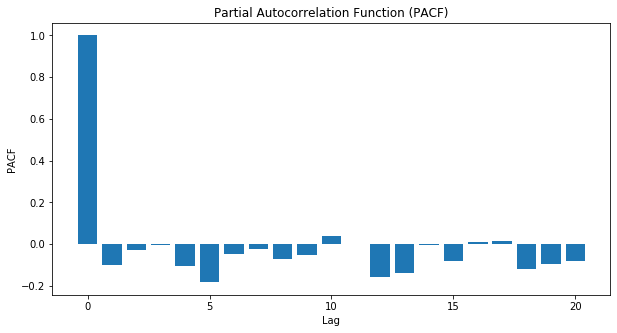

In [98]:
# plot the PACF
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.bar(x=lags, height=weather_pacf)

## ACF and PACF Analysis

For both the ACF and PACF, the coefficients for lag 5 are the highest, meaning there is a higher correlation (both in lag and lag error) between lag 5 and the current time period. Therefore, the lag and lag error values of 5 will be used for the ARIMA model.

The next step of the analysis is to fit an ARIMA model to the original time series data, using the discovered parameters from ACF and PACF.

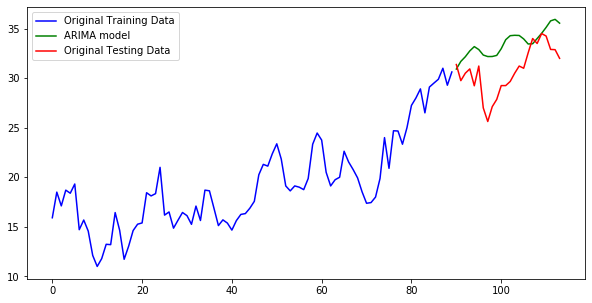

In [99]:
from statsmodels.tsa.arima_model import ARIMA

train_data = delhi_weather['meantemp_celsius'][:90]
test_data = delhi_weather['meantemp_celsius'][90:]

# instantiate an ARIMA model, with lag of 1, difference of 1, and lag error of 1
arima_model = ARIMA(train_data, order=(5, 1, 5))

# fit the ARIMA model
arima_results = arima_model.fit(disp=-1)

indexes = [i for i in range(90, 114)]

predictions_df = pd.DataFrame(arima_results.forecast(steps=24)[0], columns=['Forecasts'], index=indexes)

# generate line chart
plt.plot(train_data, color='blue', label='Original Training Data')
plt.plot(predictions_df, color='green', label='ARIMA model')
plt.plot(test_data, color='red', label='Original Testing Data')
plt.legend(loc='best')

## Summary

The ARIMA model was trained on the temperature from the first 90 days of the data set, and then forecasted the remaining 24 days. Based on the visualization above, the model predicted a steadily increasing temperature, with fluctuations approximately every 8-10 days. The actual temperature (shown from the test data set) decreased fairly sharply, then increased steadily. The predictions from the ARIMA are fairly accurate in the beginning and ending few predictions, with the exception of the sharp dropoff in the middle of the test data set.